Node Degrees:
Node 1,1 has degree 1
Node 1,2 has degree 2
Node 1,3 has degree 2
Node 2,3 has degree 2
Node 1,4 has degree 1
Node 1,5 has degree 2
Node 2,5 has degree 3
Node 2,1 has degree 2
Node 2,2 has degree 2
Node 3,1 has degree 1
Node 3,2 has degree 3
Node 2,4 has degree 2
Node 3,3 has degree 2
Node 4,2 has degree 2
Node 3,4 has degree 3
Node 3,5 has degree 3
Node 4,4 has degree 2
Node 4,5 has degree 2
Node 4,1 has degree 2
Node 5,1 has degree 2
Node 4,3 has degree 1
Node 5,5 has degree 2
Node 5,2 has degree 2
Node 5,3 has degree 1
Node 5,4 has degree 1

Sum of all node degrees: 48
Visiting: 1,3
Visiting: 1,2
Visiting: 1,1
Visiting: 2,3
Visiting: 2,4
Visiting: 2,5
Visiting: 1,5
Visiting: 1,4
Visiting: 3,5
Visiting: 3,4
Visiting: 3,3
Visiting: 3,2
Visiting: 2,2
Visiting: 2,1
Visiting: 3,1
Visiting: 4,2
Visiting: 4,1
Visiting: 5,1
Visiting: 5,2
Visiting: 5,3
Reached target: 5,3

Exploration path:
1,3 -> 1,2 -> 1,1 -> 2,3 -> 2,4 -> 2,5 -> 1,5 -> 1,4 -> 3,5 -> 3,4 -> 3,3 -> 3,2 -> 2,2 

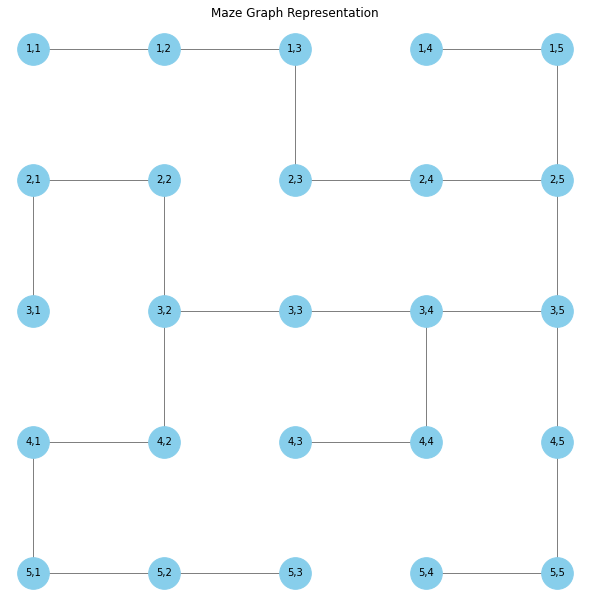

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency list representing the maze
maze_graph = {
    '1,1': ['1,2'],
    '1,2': ['1,1', '1,3'],
    '1,3': ['1,2', '2,3'],
    '1,4': ['1,5'],
    '1,5': ['1,4', '2,5'],
    '2,1': ['2,2', '3,1'],
    '2,2': ['2,1', '3,2'],
    '2,3': ['1,3', '2,4'],
    '2,4': ['2,3', '2,5'],
    '2,5': ['1,5', '2,4'],
    '3,1': ['2,1'],
    '3,2': ['2,2', '3,3', '4,2'],
    '3,3': ['3,2', '3,4'],
    '3,4': ['3,3', '3,5', '4,4'],
    '3,5': ['2,5', '3,4', '4,5'],
    '4,1': ['4,2', '5,1'],
    '4,2': ['3,2', '4,1'],
    '4,3': ['4,4'],
    '4,4': ['3,4', '4,3'],
    '4,5': ['3,5', '5,5'],
    '5,1': ['4,1', '5,2'],
    '5,2': ['5,1', '5,3'],
    '5,3': ['5,2'],
    '5,4': ['5,5'],
    '5,5': ['4,5', '5,4']
}

# Create graph
G = nx.Graph()

# Add edges from adjacency list
for node, neighbors in maze_graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Optional: create node positions for plotting based on grid coordinates
pos = {node: (int(node.split(',')[1]), -int(node.split(',')[0])) for node in G.nodes}

# A helper function that uses a for loop to print the degree of each node in the graph. The function should return the sum of all the node degrees. 
def print_node_degrees(graph):
    total_degree = 0
    print("Node Degrees:")
    for node in graph.nodes:
        degree = graph.degree[node]
        print(f"Node {node} has degree {degree}")
        total_degree += degree
    return total_degree

sum_of_degrees = print_node_degrees(G)
print(f"\nSum of all node degrees: {sum_of_degrees}")

# Implement DFS to traverse the maze starting from '1,3' and stopping at the target node '5,3', while printing the exploration path:
def dfs_maze(graph, start, target):
    visited = set()
    stack = [start]
    path = []

    while stack:
        current = stack.pop()
        if current not in visited:
            print(f"Visiting: {current}")
            path.append(current)
            visited.add(current)

            if current == target:
                print(f"Reached target: {target}")
                return path

            # Optional: add neighbours in reverse sorted order for consistent pathing
            for neighbor in sorted(graph.neighbors(current), reverse=True):
                if neighbor not in visited:
                    stack.append(neighbor)
    
    print("Target not reachable.")
    return path

# Run DFS from '1,3' to '5,3'
exploration_path = dfs_maze(G, '1,3', '5,3')

# Print the full path taken
print("\nExploration path:")
print(" -> ".join(exploration_path))


# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10, edge_color='gray')
plt.title("Maze Graph Representation")
plt.axis('off')
plt.show()
